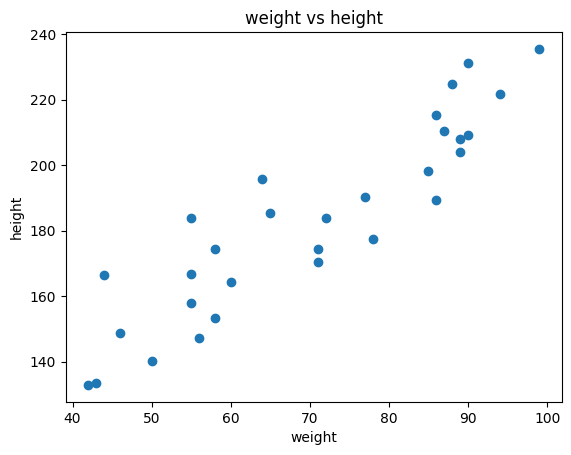

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

weight = np.random.randint(40, 100, 30)
height = np.sqrt(weight / 20) * 100 + np.random.randint(-20, 20, 30)

# plot
plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('weight vs height')
plt.show()

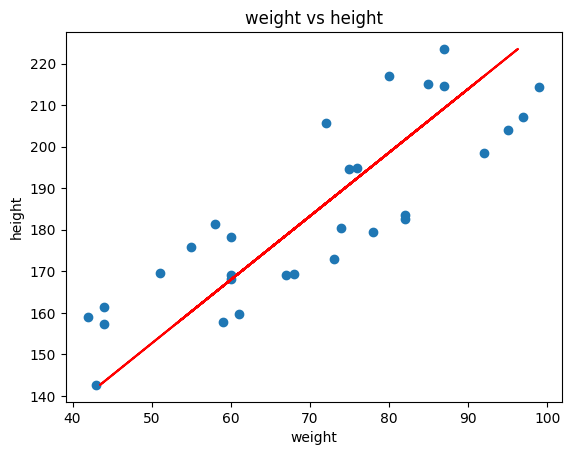

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

weight = np.random.randint(40, 100, 30)
height = np.sqrt(weight / 20) * 100 + np.random.randint(-20, 20, 30)

# implement linear regression using scikit to predict weight from height
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(height.reshape(-1, 1), weight)
weight_pred = model.predict(height.reshape(-1, 1))


# plot
plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('weight vs height')

# plot the regression line
plt.plot(weight_pred, height, color='red')
plt.show()


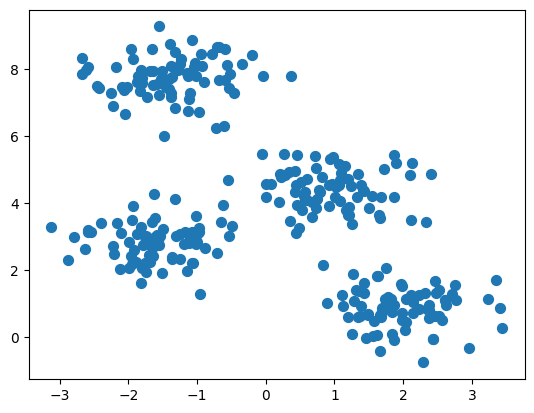

In [3]:
# Create a sample of clustering data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

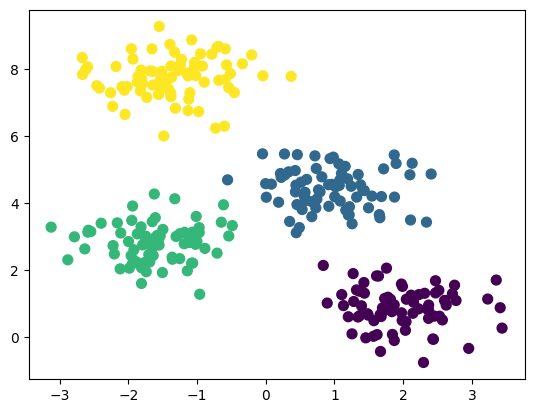

In [4]:
# Create a sample of clustering data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Implement K-NN clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.show()

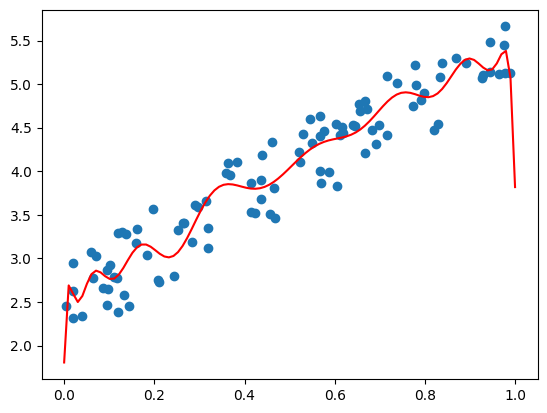

In [5]:
# Create a sample X and Y data

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Make a overfit regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(20), LinearRegression())
model.fit(X, y)

# Plot the data
plt.scatter(X, y)

# draw the model
X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red')

plt.show()

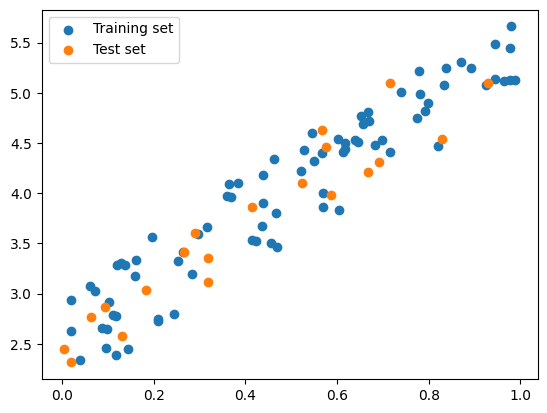

In [6]:
# Split the data into training and test set manually

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Split the data into training and test set manually
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Plot the training and test set
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')
plt.legend()
plt.show()

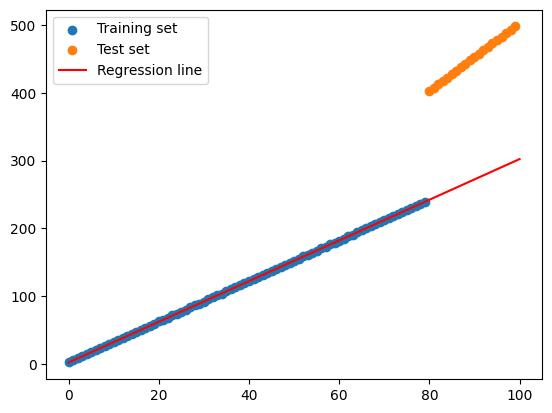

In [7]:
# Split the data into training and test set manually

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
# X being a 100 x 1 matrix, ordered from 0 to 100
X = np.arange(100).reshape(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)
y[X >= 80] = 2 + 5 * X[X >= 80].flatten() + np.random.rand(len(X[X >= 80]))

# Split the data into training and test set manually
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the training and test set
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')

# Plot the regression line
X_test = np.linspace(0, 100, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.legend()

plt.show()

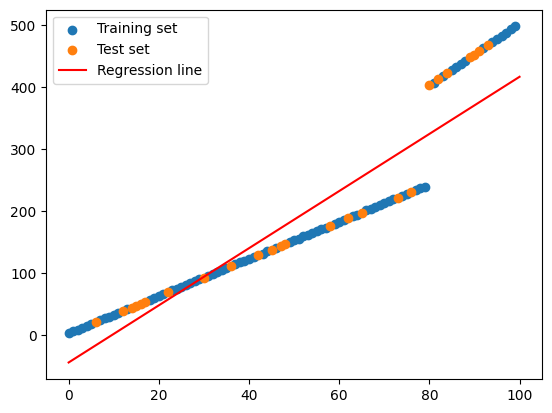

In [8]:
# Split the data into training and test set manually

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
# X being a 100 x 1 matrix, ordered from 0 to 100
X = np.arange(100).reshape(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)
y[X >= 80] = 2 + 5 * X[X >= 80].flatten() + np.random.rand(len(X[X >= 80]))

# Split the data into training and test using scikit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True) # Make sure it's shuffled 

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the training and test set
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')

# Plot the regression line
X_test = np.linspace(0, 100, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.legend()

plt.show()

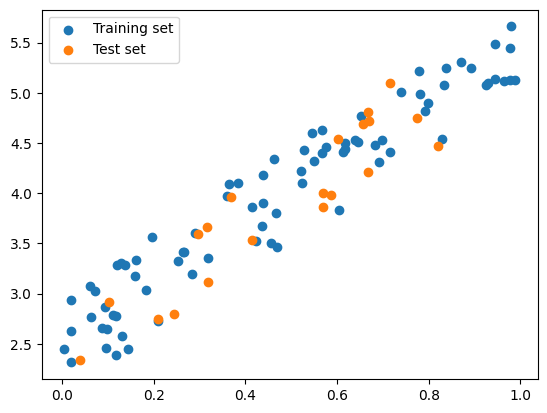

Fold score: 0.83


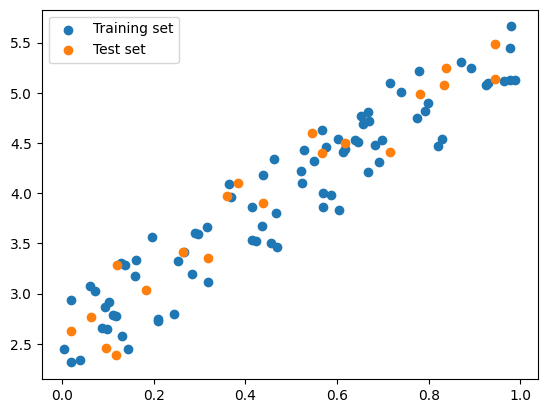

Fold score: 0.93


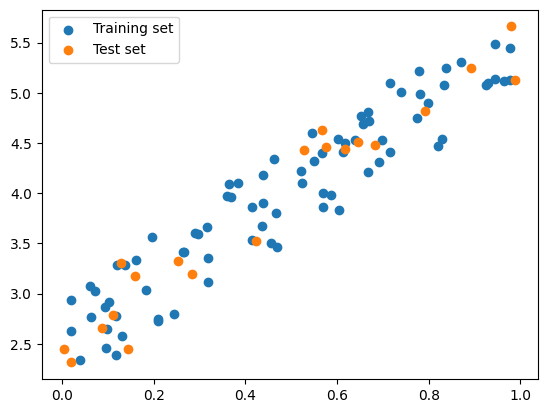

Fold score: 0.94


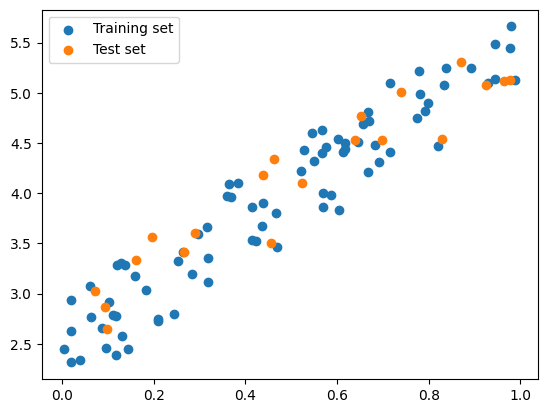

Fold score: 0.87


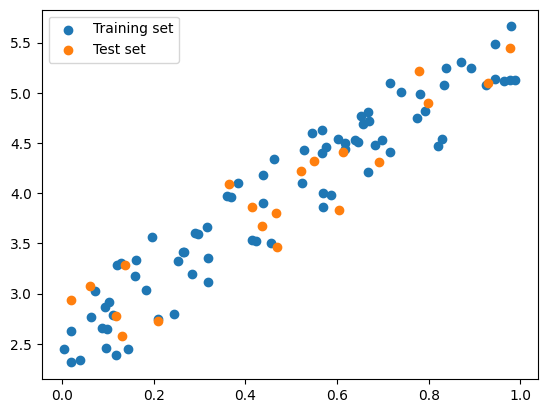

Fold score: 0.88
Overall score: 0.89


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Initialize the linear regression model
model = LinearRegression()

# Initialize the 5-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True)

# Train and evaluate the model on each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data for this fold
    model.fit(X_train, y_train)

    # Evaluate the model on the test data for this fold
    score = model.score(X_test, y_test)

    # Draw the plot
    plt.scatter(X_train, y_train, label='Training set')
    plt.scatter(X_test, y_test, label='Test set')
    
    # Show the plot
    plt.legend()
    plt.show()

    # Print the score for this fold
    print(f"Fold score: {score:.2f}")

# Compute the overall score across all folds
scores = cross_val_score(model, X, y, cv=kf)
print(f"Overall score: {np.mean(scores):.2f}")

## Regression vs Classification

In [ ]:
# Download MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [ ]:
X = mnist['data']
y = mnist['target']

print(X.shape, y.shape)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Plot the first 20 images

import matplotlib.pyplot as plt

for i in range(5):
    some_digit = X.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, y[i], fontsize=14, color='g')
    plt.show()

### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt

# split the data into train and test
train_size = 60000
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

is_7_train = train_y == '7'
is_7_test = test_y == '7'

# Train the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_X, is_7_train)

In [ ]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = sgd_clf.predict(test_X)
cm = confusion_matrix(is_7_test, y_pred)
print(cm)

In [ ]:
# Draw the false positive

import matplotlib.pyplot as plt

false_positive = (is_7_test == False) & (y_pred == True)
false_positive_images = test_X[false_positive]

for i in range(3):
    some_digit = false_positive_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'False Positive (predicted 7, but it is NOT 7)', fontsize=14, color='r')
    plt.show()

In [ ]:
# Draw the false negative

import matplotlib.pyplot as plt

false_negative = (is_7_test == True) & (y_pred == False)
false_negative_images = test_X[false_negative]

for i in range(3):
    some_digit = false_negative_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'False Negative (predicted NOT 7, but it is 7)', fontsize=14, color='r')
    plt.show()

In [ ]:
# Draw the true negative

import matplotlib.pyplot as plt

true_negative = (is_7_test == False) & (y_pred == False)
true_negative_images = test_X[true_negative]

for i in range(3):
    some_digit = true_negative_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'True Negative (predicted NOT 7, and it is NOT 7)', fontsize=14, color='g')
    plt.show()

In [ ]:
# Draw the true positive

import matplotlib.pyplot as plt

true_positive = (is_7_test == True) & (y_pred == True)
true_positive_images = test_X[true_positive]

for i in range(3):
    some_digit = true_positive_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'True Positive (predicted 7, and it is 7)', fontsize=14, color='g')
    plt.show()